In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os

## Reading the dataset

In [2]:
df = pd.read_csv("iris.csv")
df.head(6)

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


In [3]:
df.describe()

,Sepal_length,Sepal_width,Petal_length,Petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  150 non-null    float64
 1   Sepal_width   150 non-null    float64
 2   Petal_length  150 non-null    float64
 3   Petal_width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


------------------------------------------------------------------------------------------------------------------------------
The target variable is in string form this needs to be converted to numeric form to be used for deep learning therefore we use lable encoder. Then we convert the dataframe to numpyarray which is required for Keras deep learning. We then seperate the feature and target variables.

In [5]:
from sklearn.preprocessing import LabelEncoder
labl = LabelEncoder()

In [6]:
df['Species'] = labl.fit_transform(df['Species'])
df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df_npy = df.to_numpy()
df_npy

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [8]:
X_data = df_npy[:,0:4]
y_data=df_npy[:,4]
X_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
y_data

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

## Scaling the data. 
As each column might be on different scales so we need to standerdize the scaling.Here I will standardize features by removing the mean and scaling to unit variance.Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data(mean=0,std_varience=1).The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_data)
X_data = scaler.transform(X_data)
X_data

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

## One-hot encoding target variables
In one-hot encoding, each unique category value is assigned a unique integer code, and then the integer code is converted into a binary vector that is all zeros. to-categorical function is used for one-hot encoding categorical variables.

In [11]:
y_data = tf.keras.utils.to_categorical(y_data,3)
y_data

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

## Splitting data into training and test dataset
Spliting the dataset into training and test datasets. 20% of the data set is allocated for testing.

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split( X_data, y_data, test_size=0.20)

## Defining a model 

Sequential is a class which is used for creating linear stack of layers in neural network.

In [13]:
from tensorflow import keras
model = tf.keras.models.Sequential()

Now I added layers to the model.Here I used 2 Dense layer with 10 neurons and used a rectified linear unit activation("relu").
The third line the the output layer it has 3 neurons and is using a softmax activation function. The model has two hidden layer and one output layer.

In [14]:
model.add(keras.layers.Dense(10, input_shape=(4,), activation='relu', name='Layer_1'))
model.add(keras.layers.Dense(10, activation='relu', name='Layer_2'))
model.add(keras.layers.Dense(3, activation='softmax', name='Output'))

Now I compiled the model using optimizer(Adam) with learning rate of 0.001. In the loss parameter I used 'categorical_crossentropy'. Loss tells how weel is th emodel learning during traning.In metrics I used 'accuracy' it mesures how many sample are correctly classified.

In [15]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer,loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 10)                50        
                                                                 
 Layer_2 (Dense)             (None, 10)                110       
                                                                 
 Output (Dense)              (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


## Training the model
Now I will train the mode. Here I used a Batch_size of 5 it means the model will update its weight after processing 5 traning samples.Here I use 50 epochs. Epochs means the number of times the traning data is used to update the model weight. I set the validation split to 20% it means 20% of the data will be used for validation.

In [17]:
Verbose = 2
Batch_size = 5
Epochs = 50
Val_split = 0.20
history = model.fit(X_train,y_train,batch_size=Batch_size,epochs=Epochs,verbose=Verbose,validation_split=Val_split)

Epoch 1/50
20/20 - 1s - loss: 1.2557 - accuracy: 0.2917 - val_loss: 1.1723 - val_accuracy: 0.3750 - 712ms/epoch - 36ms/step
Epoch 2/50
20/20 - 0s - loss: 1.1061 - accuracy: 0.3958 - val_loss: 1.0092 - val_accuracy: 0.4167 - 65ms/epoch - 3ms/step
Epoch 3/50
20/20 - 0s - loss: 0.9918 - accuracy: 0.4896 - val_loss: 0.8850 - val_accuracy: 0.5833 - 60ms/epoch - 3ms/step
Epoch 4/50
20/20 - 0s - loss: 0.9103 - accuracy: 0.5625 - val_loss: 0.7914 - val_accuracy: 0.6667 - 60ms/epoch - 3ms/step
Epoch 5/50
20/20 - 0s - loss: 0.8457 - accuracy: 0.5938 - val_loss: 0.7157 - val_accuracy: 0.7500 - 49ms/epoch - 2ms/step
Epoch 6/50
20/20 - 0s - loss: 0.7934 - accuracy: 0.6042 - val_loss: 0.6587 - val_accuracy: 0.7917 - 50ms/epoch - 3ms/step
Epoch 7/50
20/20 - 0s - loss: 0.7475 - accuracy: 0.6146 - val_loss: 0.6074 - val_accuracy: 0.8333 - 52ms/epoch - 3ms/step
Epoch 8/50
20/20 - 0s - loss: 0.7075 - accuracy: 0.6146 - val_loss: 0.5634 - val_accuracy: 0.8333 - 49ms/epoch - 2ms/step
Epoch 9/50
20/20 - 0s 

## Accuracy improvement Graph
This graph shows how to accuracy changed after each epoch

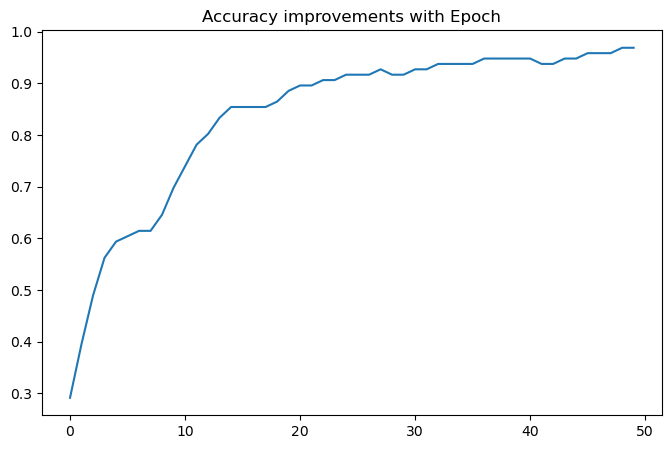

In [18]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

In [19]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 48ms/step - loss: 0.1387 - accuracy: 0.9667


[0.13865311443805695, 0.9666666388511658]